In [1]:
#Importamos bibliotecas básicas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')
plt.style.use('fivethirtyeight')

## Perceptrón MultiCapa (*MultiLayer Perceptron*, MLP) - Redes Neuronales Artificiales (RNA)

<img src="images/mlp.png" alt="MLP" width="800" style="vertical-align:middle;margin-left:auto;margin-right:auto">


Las RNA contienen neuronas artificiales, las cuales constituyen las unidades básicas de la red. Estas están agrupadas en una o varias capas, que en conjunto forman la RNA como sistema. Cada una de las capas pueden contener desde algunas pocas a millones de unidades (neuronas). 

Una red neuronal está compuesta, en grandes rasgos, por una capa de entrada, una o varias capas ocultas, y una capa de salida. La capa de entrada en la receptora de los datos de los cuales se quiere aprender, y es la encargada de ordenarlos para luego enviarlos a las capas ocultas las cuales a su vez producirán la información de valor para la capa de salida quien es la encargada de realizar la predicción final.

En procesamiento de imágenes, cada una de las neuronas en la capa de entrada podría representar el valor de un píxel o característica extraída de un imagen.

En general, mientras más neuronas y capas ocultas existan en la red, más complejos serán los patrones que podrán aprender/descubrir de los datos.

En una red completamente conectada (*fully connected*) cada una de las neuronas está conectada con todas las neuronas de las capas anterior y posterior. Estás conexiones tienen pesos (los cuales son los parámetros a ser aprendidos mediante el entrenamiento de la red) que determinan la influencia de una unidad sobre las otras.

## Diseño de una red neuronal simple

<img src="images/mlp_simple.png" alt="MLP" width="800" style="vertical-align:middle;margin-left:auto;margin-right:auto">

- ¿Cuántos valores de entrada tiene?
- ¿Cuántas capas ocultas tiene?
- ¿Cuántos parámetros deben ser entrenados?

Notar que cada una de las neuronas está conectada a cada una de las neuronas de la capa siguiente, esto es una red completamente conectada (*fully connected*)
En procesamiento de imágenes, la cantidad de valores de entrada (*inputs*) podría ser el número de pixeles o de características de la imagen.

- Cantidad de entradas: <span style="color:green"># Complete aquí</span>
- Cantidad de capas ocultas: <span style="color:green"># Complete aquí</span>
- Cantidad de neuronas en cada capa oculta: <span style="color:green"># Complete aquí</span>
- Cantidad de neuronas en capa de salida: <span style="color:green"># Complete aquí</span>
- Cantidad de pesos por capa: <span style="color:green"># Complete aquí</span>
- Cantidad de parámetros a entrenar: <span style="color:green"># Complete aquí</span>


- Cantidad de entradas: <span style="color:green">2</span>
- Cantidad de capas ocultas: <span style="color:green">1</span>
- Cantidad de neuronas en cada capa oculta: <span style="color:green">16</span>
- Cantidad de neuronas en capa de salida: <span style="color:green">1</span>
- Cantidad de pesos por capa: <span style="color:green">(2+1)x16, (16+1)x1</span>
- Cantidad de parámetros a entrenar: <span style="color:green">48 + 17 = 65</span>

## Funciones de activación



Las funciones de activación determinan como será la respuesta de una neurona.

La función sigmoidea (**$\sigma$**) los valores al rango $[0,1]$, lo cual resulta útil para las probabilidades.

**ReLU** es excelente para evitar el desvanecimiento de gradientes en redes profundas.

En el procesamiento de imágenes, **ReLU** es particularmente popular porque ayuda a preservar características importantes a la vez que suprime el ruido.

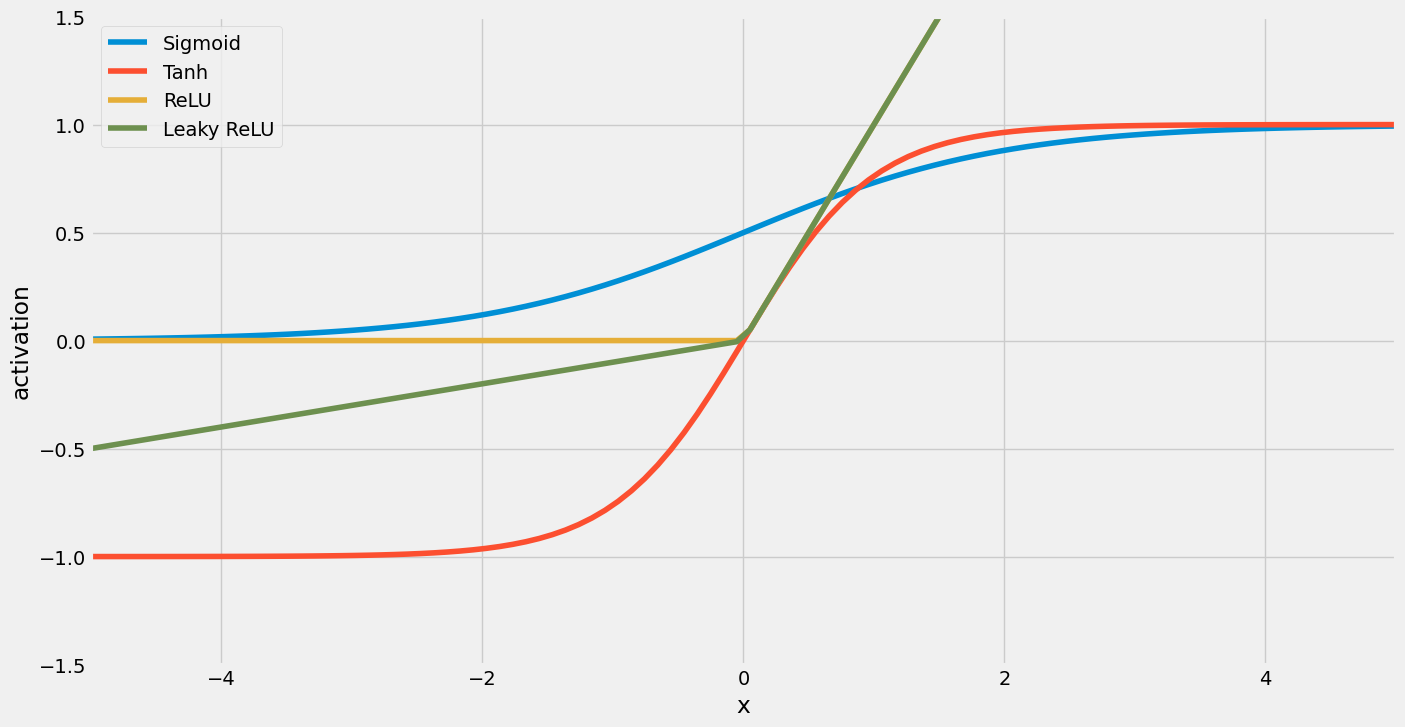

In [2]:
sigmoid = lambda x: 1./(1. + np.exp(-x))
tanh = lambda x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
relu = lambda x: np.where(x > 0, x, 0)
heaviside = lambda x: np.where(x < 0, -1, 1)
leaky_relu = lambda epsilon, x: np.where(x > 0, x, epsilon*x)

x = np.linspace(-5,5,100)
plt.figure(figsize=(15,8))
plt.plot(x,sigmoid(x),label="Sigmoid")
plt.plot(x,tanh(x),label="Tanh")
plt.plot(x,relu(x),label="ReLU")
plt.plot(x,leaky_relu(1.e-1,x),label="Leaky ReLU")

plt.xlabel("x"); plt.ylabel("activation")
plt.legend()
plt.xlim(-5,5); plt.ylim(-1.5,1.5);

## Función de Costo (**LOSS**)

- Mide la calidad de una predicción, comparando la misma con el valor de referencia o la etiqueta del dato de entrenamiento correspondiente.

- Devuelve un valor alto si la predicción es incorrecta, y bajo si la predicción es correcta.

- Durante el proceso de entrenamiento buscamos minimizar esta función de costo, optimizando los parámetros del algoritmo.


### Mean Squared Error (MSE) Loss

Una de las más utilizadas especialmente en los problemas de regresión. 

Calcula el promedio de las diferencias cuadráticas entre la predicción y el valor de referencia.

$${\rm MSE} = \frac{1}{N} \sum_{i=1}^N \left( y_{true} - y_{pred} \right)^2$$


### Binary Crossentropy (BCE) Loss

Se utiliza para problemas de clasificación binaria. 

Calcula la entropía cruzada entre las etiquetas verdaderas y las predicciones del modelo.


$$ {\rm BCE} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \ln\left(\hat{y}_i\right) + \left( 1 - y_i \right) \ln \left( 1 - \hat{y}_i \right) \right]$$

donde:
- $y_i \in \{0,1\}$ es el valor de la etiqueta verdadera
- $\hat{y}_i = \sigma(z_i)$ es la probabilidad, dada por el modelo, de que el $i$-ésimo dato pertenezca a la clase 1

### Categorical Crossentropy (CCE) Loss

Se utiliza en los problemas de clasificación para medir las diferencias entre clases. 

Calcula la entropía cruzada entre las etiquetas verdaderas y las predicciones del modelo. 

$$ {\rm CCE} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{i,j} \ln\left(\hat{y}_{i,j}\right)$$

donde:
- $C$ es el número de clases
- $y_{i,j}$ es la probabilidad verdadera de que el $i$-ésimo dato pertezca a la clase $j$
- $\hat{y}_{i,j}$ es la probabilidad dada por el modelo de que el $i$-ésimo dato pertezca a la clas $j$


## Optimización de la función de costo

Durante la etapa de entrenamiento de la red neuronal, lo que se busca es minimizar la función de costo, es decir, disminuir el error de las predicciones comparadas con la verdad de campo, y por lo tanto, es esencialmente un problema de optimización.

Esta búsqueda se puede realizar de varias maneras, pero una de las soluciones más viables y simples es el método de descenso de gradiente.

$$ \nabla_{\omega} L = \left( \frac{\partial L}{\partial \omega_0}, \frac{\partial L}{\partial \omega_0}, ... \frac{\partial L}{\partial \omega_n}  \right)$$

El gradiente de una función apunta en la dirección del máximo creciemiento de la misma, por lo tanto tenemos que descender en la dirección opuesta para minimizarla.

### Método del descenso de gradiente 

1. Inicializar los parámetros $w$ de manera aleatoria
2. Dado un conjunto de datos $\mathcal{D}$

$$ \mathcal{D} = \left\{ \left( {\bf X}_i, y_i \right), \left( {\bf X}_i, y_i \right),..., \left( {\bf X}_n, y_n \right) \right\} $$
    
Computar el gradiente de la función de costo

4. Actualizar los parámetros en la dirección opuesta al gradiente

$$ \omega = \omega - \alpha \nabla L \left( \mathcal{D}, \omega \right) $$

donde $\alpha$ es la tasa de aprendizaje

3. Iterar hasta que se cumpla alguna condición (e.g. criterio de convergencia)


**Algunas variantes del método de GD**

- Gradiente descendiente estocástico

- Gradiente descendiente por mini-batches. (El cálculo del gradiente y la actualización de los pesos se hace en subconjuntos del conjunto total de datos.)


## Retropopagación de errores (Backpropagation)

La función de costo puede ser pensada como una composición de funciones (i.e. una composición de las funciones de activación de las distintas capas de la red).

$$ L \left( y, {\bf f}_K \left( {\bf \omega}_K, {\bf f}_{K-1} \left( {\bf \omega}_{K-1},...{\bf f}_2 \left( {\bf \omega}_2, {\bf f}_1 \left( {\bf \omega}_1, {\bf X}\right)\right)... \right)\right)\right)$$

Por lo tanto, si queremos calcular el gradiente $\nabla L \left( \mathcal{D}, \omega \right)$, podemos emplear la regla de la cadena:

$$ \frac{\partial L}{\partial \omega^1_K} = \frac{\partial L}{\partial {\bf f}_1} \frac{\partial {\bf f}_1}{\partial \omega^1_K} $$


Algunas cuestiones:

- Descenso de gradiente con retropropagación de errores no garantiza que encontremos el mínimo global de la función de costo. Es posible que el método de *estánque* en un mínimo secundario.
- En general, el algoritmo de retropropagación no requiere que los valores de entrada sean normalizados, pero es posible que la performance del modelo mejores si se normaliza.
- Las derivadas de las funciones de activación deben ser calculadas analíticamente.

###  Ejemplo sencillo: puerta XOR

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

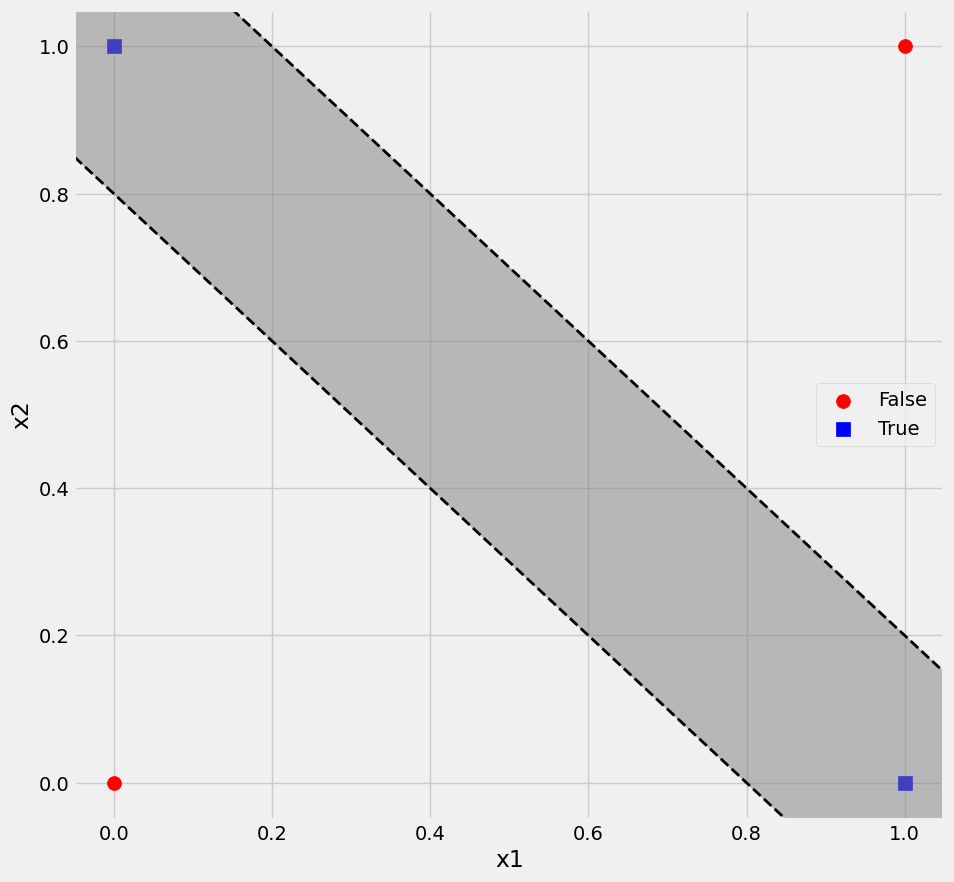

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(X[y[:,0] == 0, 0], X[y[:,0] == 0, 1], c='red', marker='o', label='False', s=100)
plt.scatter(X[y[:,0] == 1, 0], X[y[:,0] == 1, 1], c='blue', marker='s', label='True', s=100)
plt.plot([0, 1.05], [1.2, 0.15], color='black', ls='--', lw=2)
plt.plot([-0.05, 0.85], [0.85, -0.05], color='black', ls='--', lw=2)
plt.fill_between([-0.05, 1.05], [1.25, 0.15], [0.85,-0.25],color='gray', alpha=0.5)

plt.xlim(-0.05,1.05); plt.ylim(-0.05,1.05)
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend()

**Diseño de la red neuronal**

- Capa de entrada
- Capa oculta con 2 neuronas
- Capa de salida con 1 neurona

<img align="right" src="images/simple_NN_xor.png" alt="Simple NN XOR" width="800" style="padding-left:0px">

- Cantidad de pesos a entrenar: (2+1)*2 + (2+1) = 9
- Elección de la función de costo: Binary Cross Entropy
- Elección de las funciones de activación: Sigmoid & ReLU


Definimos las funciones de activación, de costo y sus respectivas derivadas.

In [5]:
def bce(y_true, y_pred):
        suma = 0.0
        for y, yhat in zip(y_true, y_pred):
                suma += y*np.log(yhat) + (1.0 - y)*np.log(1. - yhat)
        return -suma/len(y_true)

def bce_derivative(y_true, y_pred):
        return -y_true/y_pred + (1.0 - y_true)/(1. - y_pred)

sigmoid_derivative = lambda x: sigmoid(x)*(1.0 - sigmoid(x))
relu_derivative = lambda x: np.where(x > 0, 1, 0)

- Inicializamos los pesos aleatoreamente.
- Propagamos hacia adelante los valores de entrada, realizando las combinaciones lineales con los pesos y las funciones de activación.
- Calculamos la función de costo con los valores de predicción y los valores de respuesta esperados.
- Retropropagamos el error, siguiendo la dirección del gradiente de la función de costo, calculando cuánto contribuye cada uno de los parámetros al error, actualizandolos correspondientemente según la tasa de aprendizaje.

In [6]:
#Inicializamos la semilla para tener un poco de control
np.random.seed(137)

#Diseño e hyperparámetros de la red
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.01

#Definimos las matrices que alojarán los pesos y los sesgos

# Pesos: entrada(2) a capa_oculta(2)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

# Pesos: capa_oculta(2) a capa_de_salida(1)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

print("Pesos y bias iniciales:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

print("Cantidad de parámetros:", W1.size + b1.size + W2.size + b2.size)

Pesos y bias iniciales:
W1: [[ 1.09077549  1.06558071]
 [ 4.51574031 -0.66767452]]
b1: [[0. 0.]]
W2: [[-0.40789271]
 [ 0.9866497 ]]
b2: [[0.]]
Cantidad de parámetros: 9


$$
\mathbb{X} = \left(\begin{array}{cc} 
x_{1} & x_{2}
\end{array}\right)
\quad
\mathbb{W}_1 = \left(\begin{array}{cc} 
w_{11}^1 & w_{12}^1\\
w_{21}^1 & w_{22}^1
\end{array}\right)
\quad
\mathbb{b}_1 = \left(\begin{array}{cc} 
b_{11}^1 & b_{12}^1
\end{array}\right)
\quad
\mathbb{W}_2 = \left(\begin{array}{cc} 
w_{11}^2 \\
w_{21}^2
\end{array}\right)
\quad
\mathbb{b}_2 = \left(\begin{array}{cc} 
b_{11}^2
\end{array}\right)
$$ 

### Forward

In [7]:
# Capa oculta
Z1 = X @ W1  + b1       # (4x2)
A1 = sigmoid(Z1)           # (4x2)

# Capa de Salida
Z2 = A1 @ W2 + b2       # (4x1)
A2 = sigmoid(Z2)        # (4x1)

$$
\mathbb{Z}_1 = \mathbb{X} \times \mathbb{W}_1 + \mathbb{b}_1 = \left(\begin{array}{cc} 
x_{1} & x_{2}
\end{array}\right)
\times
\left(\begin{array}{cc} 
w_{11}^1 & w_{12}^1\\
w_{21}^1 & w_{22}^1
\end{array}\right)
+
\left(\begin{array}{cc} 
b_{11}^1 & b_{12}^1
\end{array}\right)
= 
\left(\begin{array}{cc} 
x_1 \cdot w_{11}^1 + x_2 \cdot w_{12}^1 + b_{11}^1 & x_1 \cdot w_{21}^1 + x_2 \cdot w_{22}^1 + b_{12}^1
\end{array}\right)
$$

$$
\mathbb{A}_1 = \left(\begin{array}{cc} 
\mathrm{sigmoid}(z_{11}^1) & \mathrm{sigmoid}(z_{12}^1) 
\end{array}\right)
$$

$$
\mathbb{Z}_2 = \mathbb{A}_1 \times \mathbb{W}_2 + \mathbb{b}_2 = 
\left(\begin{array}{cc} 
a_{1}^1 & a_{2}^1
\end{array}\right)
\times
\left(\begin{array}{cc} 
w_{11}^2 \\
w_{21}^2 
\end{array}\right)
+
\left(\begin{array}{cc} 
b_{11}^1 & b_{12}^1
\end{array}\right)
= 
\left(\begin{array}{cc} 
a_1^1 \cdot w_{11}^2 + a_2^1 \cdot w_{21}^2 + b_{11}^2
\end{array}\right)
$$

$$
\mathbb{A}_2 = \mathrm{sigmoid}(z_{11}^2)
$$

### Cómputo del error

In [8]:
loss = bce(y, A2)
print("Loss:", loss)

Loss: [0.71685994]


### Backward

In [9]:
# Capa de salida
dZ2 = bce_derivative(y, A2)*sigmoid_derivative(Z2)  # (4x1)
dW2 = A1.T @ dZ2                                    # (2x1)
db2 = np.sum(dZ2, axis=0, keepdims=True)            # (1x1)

# Capa oculta
dA1 = dZ2 @ W2.T                                    # (4x2)
dZ1 = dA1 * relu_derivative(Z1)                     # (4x2)
dW1 = X.T @ dZ1                                     # (2x2)
db1 = np.sum(dZ1, axis=0, keepdims=True)            # (1x2)

$$
\frac{\partial L}{\partial \mathbb{b}_2} = \frac{\partial L}{\partial \mathbb{A}_2} \frac{\partial \mathbb{A}_2}{\partial \mathbb{Z}_2} \frac{\partial \mathbb{Z}_2}{\partial \mathbb{b}_2}
$$

$$
\frac{\partial L}{\partial \mathbb{W}_2} = \frac{\partial L}{\partial \mathbb{A}_2} \frac{\partial \mathbb{A}_2}{\partial \mathbb{Z}_2} \frac{\partial \mathbb{Z}_2}{\partial \mathbb{W}_2}
$$


$$
d \mathbb{Z}_2 = \frac{\partial L}{\partial \mathbb{A}_2} \frac{\partial \mathbb{A}_2}{\partial \mathbb{Z}_2}
$$

$$
\frac{\partial \mathbb{Z}_2}{\partial \mathbb{b}_2} = 1
\implies
\frac{\partial L}{\partial \mathbb{b}_2} = d \mathbb{Z}_2 \cdot 1= d \mathbb{Z}_2
$$

$$
\frac{\partial \mathbb{Z}_2}{\partial \mathbb{W}_2} = 
\left(\begin{array}{cc} 
a_{11}^1 \\
a_{12}^1 
\end{array}\right) = \mathbb{A}_1^T
\implies
\frac{\partial L}{\partial \mathbb{W}_2} = d \mathbb{Z}_2 \frac{\partial \mathbb{Z}_2}{\partial \mathbb{W}_2} = \mathbb{A}_1^T \times d \mathbb{Z}_2
$$

---



$$
\frac{\partial L}{\partial \mathbb{W}_1} = \frac{\partial L}{\partial \mathbb{A}_2} \frac{\partial \mathbb{A}_2}{\partial \mathbb{Z}_2} \frac{\partial \mathbb{Z}_2}{\partial \mathbb{A}_1} 
\frac{\partial \mathbb{A}_1}{\partial \mathbb{Z}_1} \frac{\partial \mathbb{Z}_1}{\partial \mathbb{W}_1}
$$

$$
\frac{\partial L}{\partial \mathbb{b}_1} = \frac{\partial L}{\partial \mathbb{A}_2} \frac{\partial \mathbb{A}_2}{\partial \mathbb{Z}_2} \frac{\partial \mathbb{Z}_2}{\partial \mathbb{A}_1}
\frac{\partial \mathbb{A}_1}{\partial \mathbb{Z}_1} \frac{\partial \mathbb{Z}_1}{\partial \mathbb{b}_1}
$$



$$
\frac{\partial \mathbb{Z}_2}{\partial \mathbb{A}_1} = 
\left(\begin{array}{cc} 
w_{11}^2 \\
w_{12}^2 
\end{array}\right) = \mathbb{W}_2^T
$$




$$
d \mathbb{A}_1 = d \mathbb{Z}_2 \times \mathbb{W}_2^T
$$

$$
\frac{\partial \mathbb{A}_1}{\partial \mathbb{Z}_1} = 
\left(\begin{array}{cc} 
\left. \frac{\partial \mathrm{sigmoid(x)}}{\partial x}\right|_{z_{11}^1} &  \left. \frac{\partial \mathrm{sigmoid(x)}}{\partial x}\right|_{z_{12}^1}
\end{array}\right)
$$

$$
d \mathbb{Z}_1 = d \mathbb{A}_1 \times \frac{\partial \mathbb{A}_1}{\partial \mathbb{Z}_1}

$$

$$
\frac{\partial \mathbb{Z}_1}{\partial \mathbb{W}_1} = 
\left(\begin{array}{cc} 
x_1 \\
x_2 
\end{array}\right) = \mathbb{X}^T
\implies \frac{\partial L}{\partial \mathbb{W}_1} = d \mathbb{Z}_2 d \mathbb{A}_1 d \mathbb{Z}_1 \frac{\partial \mathbb{Z}_1}{\partial \mathbb{W}_1} = \mathbb{X}^T \times d\mathbb{Z}_1
$$

$$
\frac{\partial \mathbb{Z}_1}{\partial \mathbb{b}_1} = 1
\implies
\frac{\partial L}{\partial \mathbb{b}_1} = d \mathbb{Z}_2 d \mathbb{A}_1 d \mathbb{Z}_1 \cdot 1
$$



### Actualización de pesos (parámetros)

In [10]:
W2 -= learning_rate * dW2
b2 -= learning_rate * db2
W1 -= learning_rate * dW1
b1 -= learning_rate * db1

print("Pesos y sesgos actualizados:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

# Recalculamos la salida
Z1 = X @ W1 + b1       # (4x2)
A1 = sigmoid(Z1)           # (4x2)
Z2 = A1 @ W2 + b2       # (4x1)
A2 = sigmoid(Z2)        # (4x1)
loss = bce(y, A2)

print("Función de costo:", loss)

Pesos y sesgos actualizados:
W1: [[ 1.09139278  1.06408754]
 [ 4.51585688 -0.67305986]]
b1: [[-0.00149249 -0.00149318]]
W2: [[-0.4081209 ]
 [ 0.98521299]]
b2: [[-0.00205942]]
Función de costo: [0.71664581]


---
---
##  The Math Behind It

### Binary Cross-Entropy (BCE) Loss:

Para un conjunto de predicciones $\hat{y}_i$ y variables objetivo $y_i$, la función de costo (BCE) se calcula según la siguiente fórmula:

$$
\text{BCE} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

donde:
- $y_i \in \{0,1\}$
- $\hat{y}_i = \sigma(z_i)$ (función de activación sigmoidea)

---

### Gradiente de la función de costo

Las derivadas de la función de costo con respecto a la variable de activación $\hat{y}_i$ es:

$$
\frac{\partial \text{BCE}}{\partial \hat{y}_i} = - \frac{y_i}{\hat{y}_i} + \frac{1-y_i}{1-\hat{y}_i}
$$

---

### Regla de la cadena

Dado que $\hat{y}_i = \sigma(z_i)$, necesitamos la derivada de la función de activación sigmoidea con respecto a $z_i$

$$
\frac{\partial \hat{y}_i}{\partial z_i} = \sigma(z_i) (1 - \sigma(z_i)) = \hat{y}_i (1 - \hat{y}_i)
$$

Ahora, aplicando la regla de la cadena obtenemos:
$$
\frac{\partial \text{BCE}}{\partial z_i} = \frac{\partial \text{BCE}}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial z_i}
$$

Sustituyendo con los resultados que encontramos arriba obtenemos:

$$
\begin{align*}
& = \left( - \frac{y_i}{\hat{y}_i} + \frac{1-y_i}{1-\hat{y}_i} \right) \cdot \hat{y}_i (1 - \hat{y}_i) \\
& = -y_i (1 - \hat{y}_i) + (1 - y_i) \hat{y}_i \\
& = \hat{y}_i - y_i \\
\end{align*}
$$

Lo cual es:
$$
dZ2 = A2 - Y
$$
---
---

In [11]:
# Inicializamos la semilla para tener un poco de control
np.random.seed(65)

# Diseño e hyperparámetros de la red
learning_rate = 0.1
input_size = 2
hidden_size = 2
output_size = 1

# Pesos: capa de entrada(2) a capa oculta(2)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

# Pesos: capa oculta(2) a capa de salida(1)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

loss = 1.0
epoch = 0
steps = {}
while loss > 0.01:    
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    # Cálculo de la función de costo (BCE)
    loss = bce(y, A2)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
        steps[f'{epoch}'] = {}

    # Backward pass
    dZ2 = A2 - y
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Actualización de pesos y sesgos
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # Guardamos los pesos y sesgos cada 200 epochs
    if epoch % 200 == 0:
        steps[f'{epoch}'] = {"W1": W1.copy(), "W2": W2.copy(), "b1": b1.copy(), "b2": b2.copy()}
    
    epoch += 1

Epoch 0, Loss: [0.74961038]
Epoch 1000, Loss: [0.69320017]
Epoch 2000, Loss: [0.69315111]
Epoch 3000, Loss: [0.69313951]
Epoch 4000, Loss: [0.69313051]
Epoch 5000, Loss: [0.69311683]
Epoch 6000, Loss: [0.6930873]
Epoch 7000, Loss: [0.69299822]
Epoch 8000, Loss: [0.69249529]
Epoch 9000, Loss: [0.67402578]
Epoch 10000, Loss: [0.06509007]
Epoch 11000, Loss: [0.01912726]
Epoch 12000, Loss: [0.01088917]


```python
import numpy as np

class NeuralNetwork:
    """
    # Training data (X) and labels (y)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
    y = np.array([[0], [1], [1], [0]])              # XOR-like problem
    
    # Initialize and train the network
    nn = NeuralNetwork()
    nn.train(X, y, epochs=1000, lr=0.1)
    
    # Test predictions
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = nn.forward(test_inputs)
    
    print("\nPredictions:")
    for i, pred in enumerate(predictions):
        print(f"Input: {test_inputs[i]}, Output: {pred[0]:.4f}")
    """

    def __init__(self,input_size=2, hidden_size=2, output_size=1):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return sigmoid(x)*(1.0 - sigmoid(x))

    def bce(y_true, y_pred):
        suma = 0.0
        for y, yhat in zip(y_true, y_pred):
                suma += y*np.log(yhat) + (1.0 - y)*np.log(1. - yhat)
        return -suma/len(y_true)

    def bce_derivative(y_true, y_pred):
        return -y_true/y_pred + (1.0 - y_true)/(1. - y_pred)

    def forward(self, X):
        # Hidden layer computation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        
        # Output computation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    
    def backward(self, X, y_true, y_pred, lr=0.1):
        # Backward pass
        dZ2 = y_pred - y_true
        dW2 = self.A1.T @ dZ2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * sigmoid_derivative(self.Z1)
        dW1 = X.T @ dZ1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Actualización de pesos y sesgos
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=1000, lr=0.1):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.bce(y, y_pred)
            self.backward(X, y, y_pred, lr)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [12]:
import numpy as np

class NeuralNetwork:
    """
    # Training data (X) and labels (y)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
    y = np.array([[0], [1], [1], [0]])              # XOR-like problem
    
    # Initialize and train the network
    nn = NeuralNetwork()
    nn.train(X, y, epochs=1000, lr=0.1)
    
    # Test predictions
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = nn.forward(test_inputs)
    
    print("\nPredictions:")
    for i, pred in enumerate(predictions):
        print(f"Input: {test_inputs[i]}, Output: {pred[0]:.4f}")
    """

    def __init__(self,input_size=2, hidden_size=2, output_size=1):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return sigmoid(x)*(1.0 - sigmoid(x))

    def bce(y_true, y_pred):
        suma = 0.0
        for y, yhat in zip(y_true, y_pred):
                suma += y*np.log(yhat) + (1.0 - y)*np.log(1. - yhat)
        return -suma/len(y_true)

    def bce_derivative(y_true, y_pred):
        return -y_true/y_pred + (1.0 - y_true)/(1. - y_pred)

    def forward(self, X):
        # Hidden layer computation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        
        # Output computation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    
    def backward(self, X, y_true, y_pred, lr=0.1):
        # Backward pass
        dZ2 = y_pred - y_true
        dW2 = self.A1.T @ dZ2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * sigmoid_derivative(self.Z1)
        dW1 = X.T @ dZ1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Actualización de pesos y sesgos
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=1000, lr=0.1):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.bce(y, y_pred)
            self.backward(X, y, y_pred, lr)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

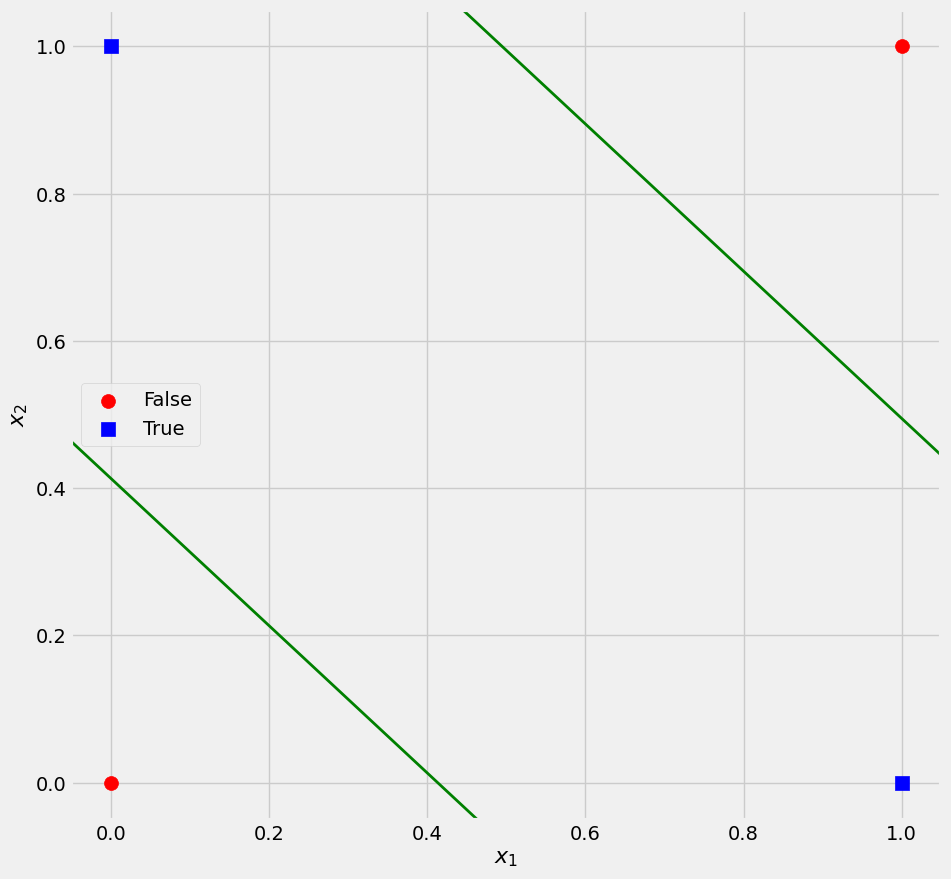

In [13]:
plt.figure(figsize=(10,10))

plt.scatter(X[y[:,0] == 0, 0], X[y[:,0] == 0, 1], c='red', marker='o', label='False', s=100)
plt.scatter(X[y[:,0] == 1, 0], X[y[:,0] == 1, 1], c='blue', marker='s', label='True', s=100)

neuron = 0
w = [b1[0,neuron],W1[0,neuron],W1[1,neuron]]
x1 = np.linspace(-1.1,1.1,11); x2 = - w[0]/w[2] - w[1]/w[2] * x1
plt.plot(x1, x2, color='green', lw=2)

neuron = 1
w = [b1[0,neuron],W1[0,neuron],W1[1,neuron]]
x1 = np.linspace(-1.1,1.1,11); x2 = - w[0]/w[2] - w[1]/w[2] * x1
plt.plot(x1, x2, color='green', lw=2)

plt.xlim(-0.05,1.05); plt.ylim(-0.05,1.05)
plt.xlabel('$x_1$',fontsize=16); plt.ylabel('$x_2$',fontsize=16)
plt.legend();

In [14]:
%%capture

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(-5.0,5.0)
ax.set_ylim(-5.0,5.0)
ax.set_xlabel('$x_1$',fontsize=16); ax.set_ylabel('$x_2$',fontsize=16)
plt.legend();

ax.scatter(X[y[:,0] == 0, 0], X[y[:,0] == 0, 1], c='red', marker='o', label='False', s=100)
ax.scatter(X[y[:,0] == 1, 0], X[y[:,0] == 1, 1], c='blue', marker='s', label='True', s=100)

x1 = np.linspace(-5., 5., 11)
line1, = ax.plot([], [], 'g-', lw=2)
line2, = ax.plot([], [], 'y-', lw=2)


def update(frame):
    global steps
    step = steps[list(steps.keys())[frame]]
    _b1 = step["b1"]
    _b2 = step["b2"]
    _W1 = step["W1"]
    _W2 = step["W2"]

    neuron = 0
    w = [_b1[0,neuron],_W1[0,neuron],_W1[1,neuron]]
    if w[2] != 0:  # evitar división por cero
        x2 = -w[0]/w[2] - w[1]/w[2]*x1
        line1.set_data(x1, x2)
        
        
    neuron = 1
    w = [_b1[0,neuron],_W1[0,neuron],_W1[1,neuron]]
    if w[2] != 0:  # evitar división por cero
        x2 = -w[0]/w[2] - w[1]/w[2]*x1
        line2.set_data(x1, x2)
    
    return line1, line2

ani = FuncAnimation(fig, update, frames=len(steps.keys()), interval=500, repeat=False);

In [15]:
ani

# Pausa